In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [2]:
df = pd.read_csv("./SBIN Stock Price data.csv")
df

,Date,Open,High,Low,Close,Volume
0,03-01-2017,239.601049,241.957775,236.753338,240.484817,15963085
1,04-01-2017,241.368600,241.957774,237.833497,238.520874,11225978
2,05-01-2017,240.583016,241.466784,239.306450,240.926712,11970913
3,06-01-2017,241.564985,244.510899,241.073999,241.466782,12354302
4,09-01-2017,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...,...
1090,08-06-2021,432.250000,432.500000,424.000000,427.200012,31113823
1091,09-06-2021,427.500000,432.299988,418.200012,421.450012,27784834
1092,10-06-2021,424.899994,433.299988,422.399994,432.250000,27397712
1093,11-06-2021,434.850006,435.500000,425.250000,429.600006,26831924


In [3]:
#lets make day first 
df['Date'] = pd.to_datetime(df.Date,dayfirst=True)

In [4]:
df

,Date,Open,High,Low,Close,Volume
0,2017-01-03,239.601049,241.957775,236.753338,240.484817,15963085
1,2017-01-04,241.368600,241.957774,237.833497,238.520874,11225978
2,2017-01-05,240.583016,241.466784,239.306450,240.926712,11970913
3,2017-01-06,241.564985,244.510899,241.073999,241.466782,12354302
4,2017-01-09,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...,...
1090,2021-06-08,432.250000,432.500000,424.000000,427.200012,31113823
1091,2021-06-09,427.500000,432.299988,418.200012,421.450012,27784834
1092,2021-06-10,424.899994,433.299988,422.399994,432.250000,27397712
1093,2021-06-11,434.850006,435.500000,425.250000,429.600006,26831924


In [5]:
data = df.drop(['Date'], axis=1)
data.index = df.Date

In [6]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,239.601049,241.957775,236.753338,240.484817,15963085
2017-01-04,241.368600,241.957774,237.833497,238.520874,11225978
2017-01-05,240.583016,241.466784,239.306450,240.926712,11970913
2017-01-06,241.564985,244.510899,241.073999,241.466782,12354302
2017-01-09,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...
2021-06-08,432.250000,432.500000,424.000000,427.200012,31113823
2021-06-09,427.500000,432.299988,418.200012,421.450012,27784834
2021-06-10,424.899994,433.299988,422.399994,432.250000,27397712


In [7]:
train_df = data.iloc[:int(df.shape[0]*0.9595), :]
valid_df = data.iloc[int(df.shape[0]*0.9595):, :]

In [8]:
train_df.shape, valid_df.shape

((1050, 5), (45, 5))

In [9]:
df.shape

(1095, 6)

## Auto Regressive (AR) model :

### A statistical model is autoregressive if it predicts future values based on past values. 
For example, an autoregressive model might seek to predict a stock's future prices based on its past performance.

In [10]:
train_df

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,239.601049,241.957775,236.753338,240.484817,15963085
2017-01-04,241.368600,241.957774,237.833497,238.520874,11225978
2017-01-05,240.583016,241.466784,239.306450,240.926712,11970913
2017-01-06,241.564985,244.510899,241.073999,241.466782,12354302
2017-01-09,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...
2021-03-31,357.003939,364.484889,354.675461,360.967346,38651025
2021-04-01,364.336282,368.497842,359.778357,367.259277,31883453
2021-04-05,364.138102,365.822562,345.856870,350.315704,51743981


In [11]:
len(valid_df), len(train_df)

(45, 1050)

In [12]:
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(train_df['Close'], lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

1050    354.767843
1051    354.269561
1052    353.775082
1053    353.284379
1054    352.797421
1055    352.314180
1056    351.834628
1057    351.358738
1058    350.886479
1059    350.417826
1060    349.952751
1061    349.491226
1062    349.033224
1063    348.578718
1064    348.127682
1065    347.680089
1066    347.235912
1067    346.795127
1068    346.357706
1069    345.923624
1070    345.492856
1071    345.065376
1072    344.641160
1073    344.220182
1074    343.802418
1075    343.387842
1076    342.976432
1077    342.568162
1078    342.163008
1079    341.760948
1080    341.361957
1081    340.966011
1082    340.573088
1083    340.183165
1084    339.796218
1085    339.412225
1086    339.031163
1087    338.653010
1088    338.277744
1089    337.905342
1090    337.535783
1091    337.169046
1092    336.805108
1093    336.443948
1094    336.085545
dtype: float64


C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [13]:
yhat.index = valid_df.index

In [14]:
mse(yhat, valid_df['Close'])

2950.235057466435

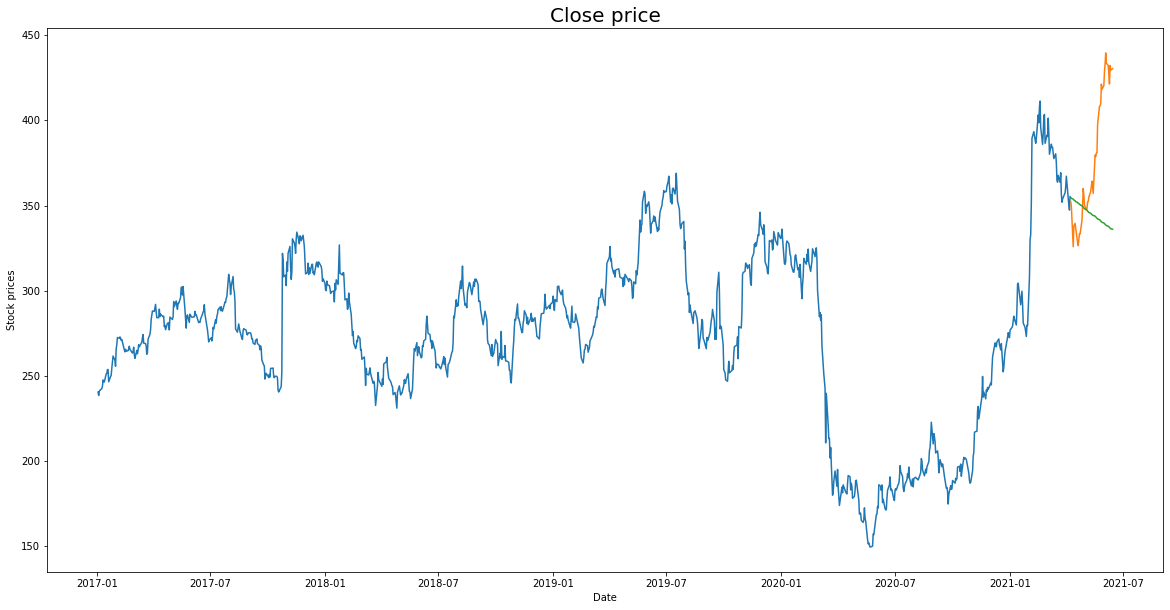

In [15]:
plt.figure(figsize=(20,10))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel("Date")
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
#plt.legend()
plt.show()

## Moving Average :
In statistics, a moving average is a calculation to analyze data points by creating a series of averages of different selections of the full data set.

In [16]:
# MA example
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0,0,1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1050    307.214099
1051    275.251423
1052    275.251423
1053    275.251423
1054    275.251423
1055    275.251423
1056    275.251423
1057    275.251423
1058    275.251423
1059    275.251423
1060    275.251423
1061    275.251423
1062    275.251423
1063    275.251423
1064    275.251423
1065    275.251423
1066    275.251423
1067    275.251423
1068    275.251423
1069    275.251423
1070    275.251423
1071    275.251423
1072    275.251423
1073    275.251423
1074    275.251423
1075    275.251423
1076    275.251423
1077    275.251423
1078    275.251423
1079    275.251423
1080    275.251423
1081    275.251423
1082    275.251423
1083    275.251423
1084    275.251423
1085    275.251423
1086    275.251423
1087    275.251423
1088    275.251423
1089    275.251423
1090    275.251423
1091    275.251423
1092    275.251423
1093    275.251423
1094    275.251423
Name: predicted_mean, dtype: float64


C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [17]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

11971.119659917318

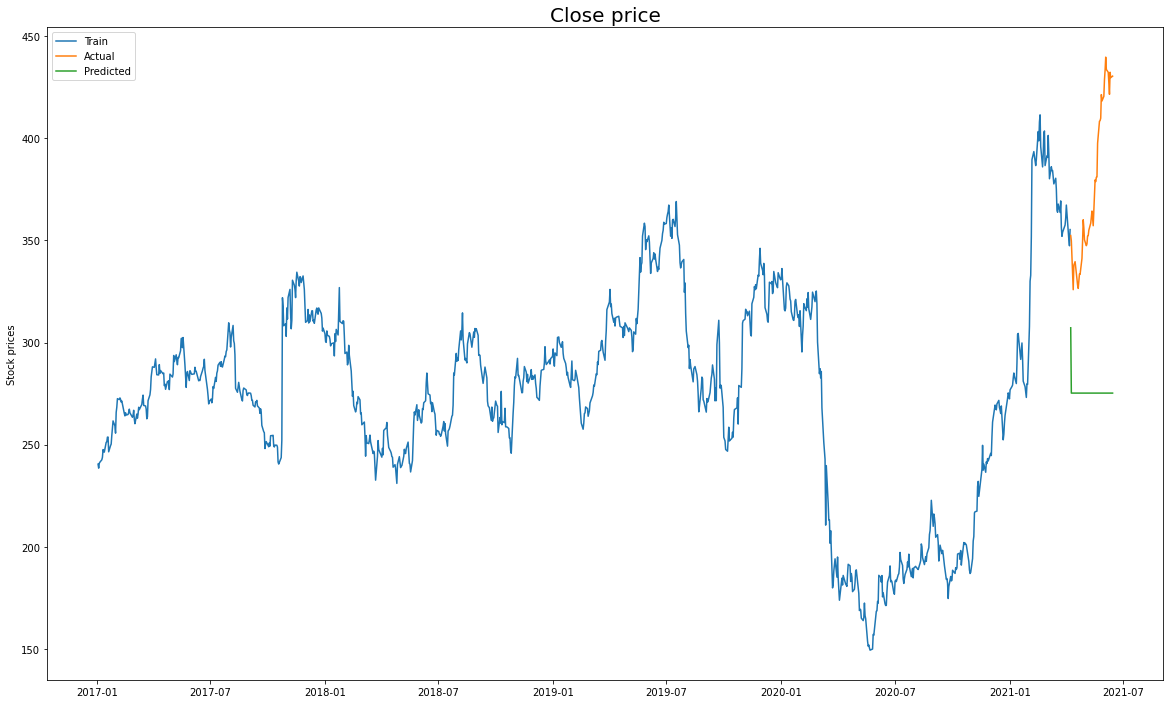

In [18]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

## Autoregressive Integrated Moving Average (ARIMA) will be used from after v_0.12

#### Autoregressive Moving Average (ARMA) has been Depricated!

Note: statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

Note: statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.

### ARIMA(0, 1, 2)

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 1, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1932.7384884982366

### ARIMA(0, 2, 1)

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 2, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

1050    355.383160
1051    355.496362
1052    355.609564
1053    355.722765
1054    355.835967
1055    355.949169
1056    356.062370
1057    356.175572
1058    356.288774
1059    356.401976
1060    356.515177
1061    356.628379
1062    356.741581
1063    356.854782
1064    356.967984
1065    357.081186
1066    357.194388
1067    357.307589
1068    357.420791
1069    357.533993
1070    357.647194
1071    357.760396
1072    357.873598
1073    357.986800
1074    358.100001
1075    358.213203
1076    358.326405
1077    358.439606
1078    358.552808
1079    358.666010
1080    358.779212
1081    358.892413
1082    359.005615
1083    359.118817
1084    359.232018
1085    359.345220
1086    359.458422
1087    359.571623
1088    359.684825
1089    359.798027
1090    359.911229
1091    360.024430
1092    360.137632
1093    360.250834
1094    360.364035
Name: predicted_mean, dtype: float64


C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [21]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1730.2576422143215

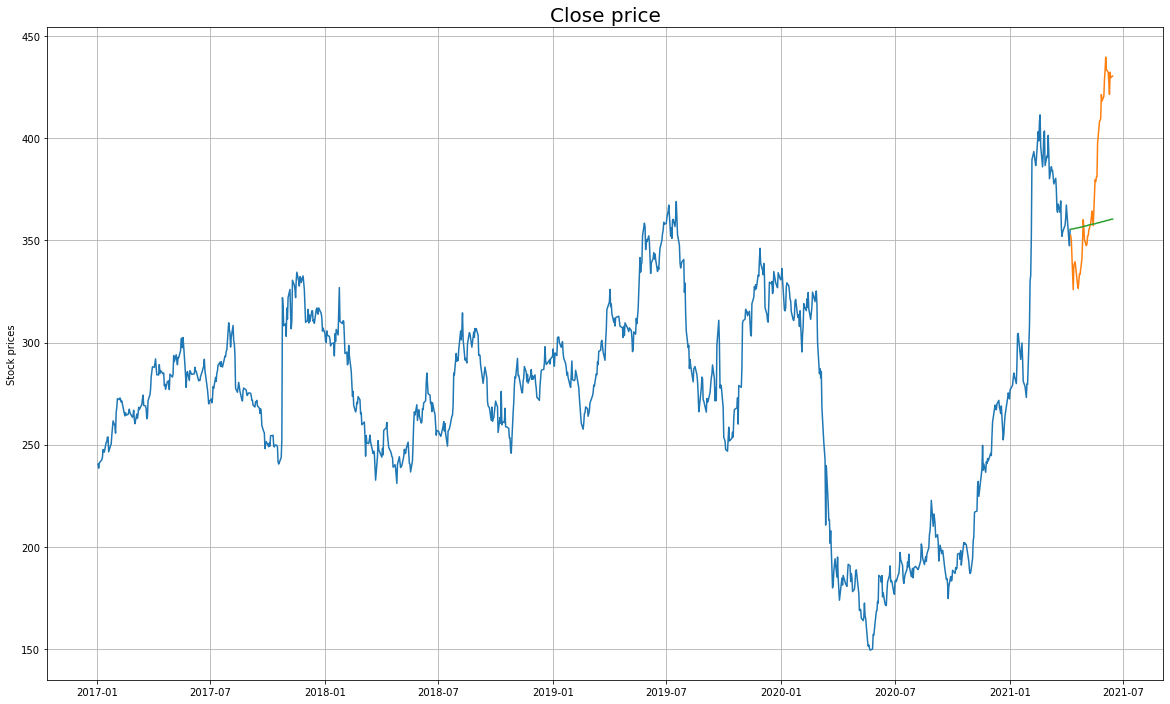

In [22]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.grid()

### ARIMA(0, 2, 2)

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 2, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1726.5327253403416

### ARIMA(3, 1, 0)

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1926.9823198309775

### ARIMA(0, 3, 2)

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 3, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

1520.9020599805206

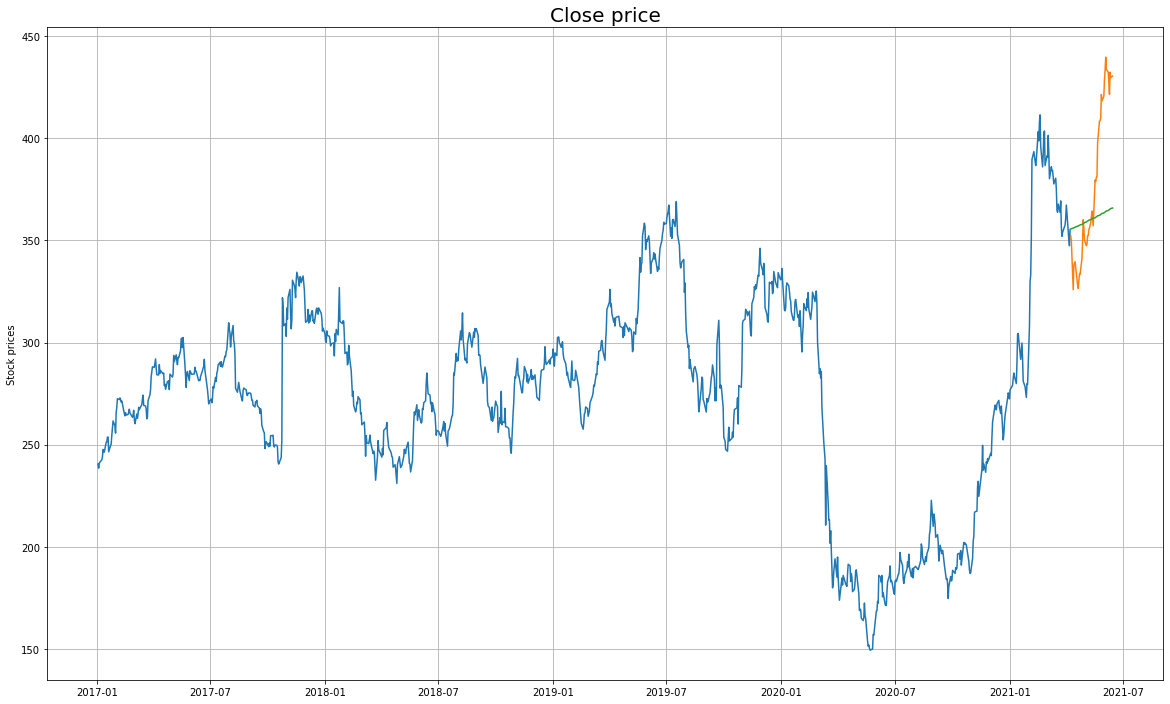

In [32]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.grid()

### ARIMA(0, 3, 3)

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 3, 3))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

841.645478188774

In [34]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(1,1,0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1939.5774334371663

### ARIMA(1,1,1)

In [35]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
print(yhat)

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1050    355.119236
1051    354.984630
1052    354.864417
1053    354.757058
1054    354.661178
1055    354.575551
1056    354.499080
1057    354.430786
1058    354.369794
1059    354.315324
1060    354.266679
1061    354.223235
1062    354.184436
1063    354.149786
1064    354.118841
1065    354.091205
1066    354.066524
1067    354.044482
1068    354.024797
1069    354.007217
1070    353.991517
1071    353.977496
1072    353.964973
1073    353.953790
1074    353.943803
1075    353.934883
1076    353.926917
1077    353.919803
1078    353.913450
1079    353.907776
1080    353.902709
1081    353.898183
1082    353.894142
1083    353.890533
1084    353.887309
1085    353.884430
1086    353.881859
1087    353.879563
1088    353.877513
1089    353.875682
1090    353.874046
1091    353.872586
1092    353.871281
1093    353.870116
1094    353.869076
Name: predicted_mean, dtype: float64


C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [36]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

2017.768709887041

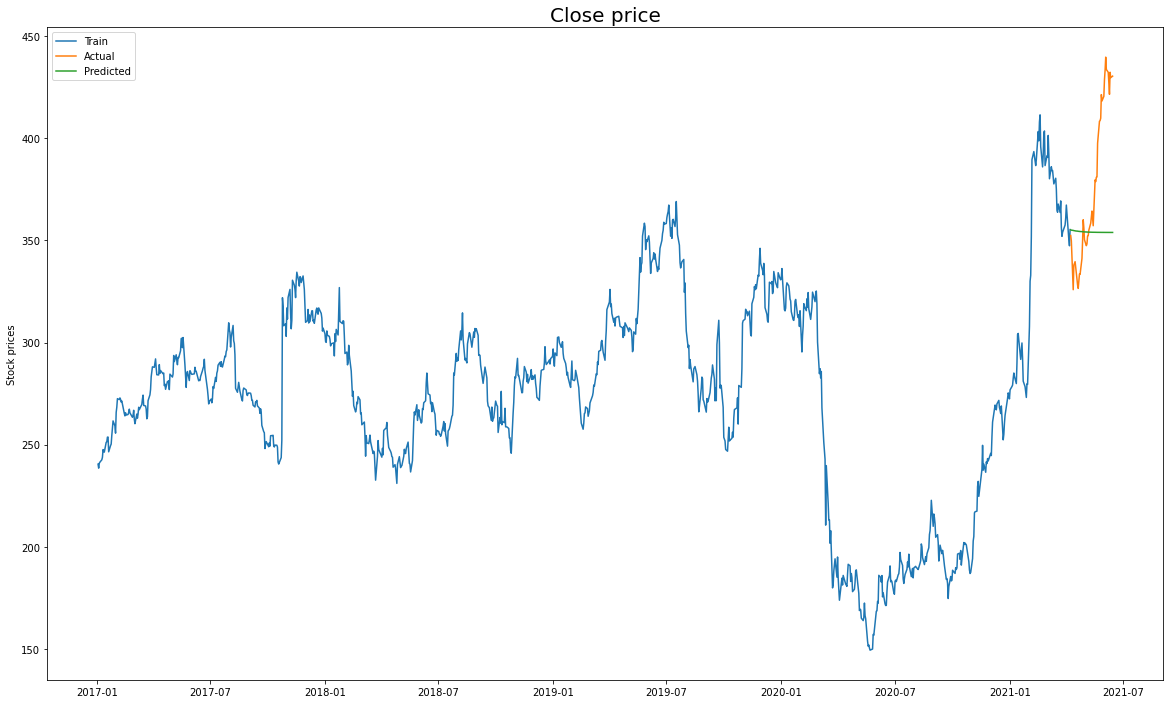

In [37]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 3, 3))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

841.645478188774

### ARIMA(2,1,1)

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(2, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
print(yhat)

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1050    355.401931
1051    355.606054
1052    355.580857
1053    355.590163
1054    355.588137
1055    355.588686
1056    355.588551
1057    355.588586
1058    355.588577
1059    355.588579
1060    355.588578
1061    355.588579
1062    355.588579
1063    355.588579
1064    355.588579
1065    355.588579
1066    355.588579
1067    355.588579
1068    355.588579
1069    355.588579
1070    355.588579
1071    355.588579
1072    355.588579
1073    355.588579
1074    355.588579
1075    355.588579
1076    355.588579
1077    355.588579
1078    355.588579
1079    355.588579
1080    355.588579
1081    355.588579
1082    355.588579
1083    355.588579
1084    355.588579
1085    355.588579
1086    355.588579
1087    355.588579
1088    355.588579
1089    355.588579
1090    355.588579
1091    355.588579
1092    355.588579
1093    355.588579
1094    355.588579
Name: predicted_mean, dtype: float64


In [40]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1931.3595801722847

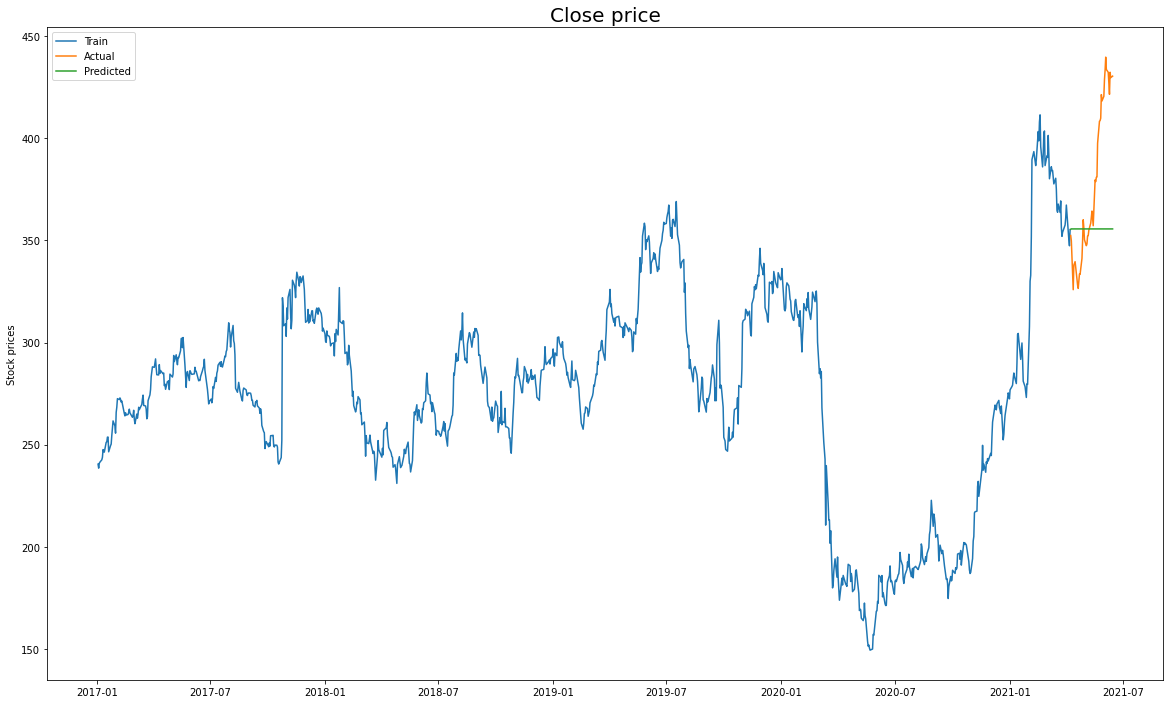

In [41]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### ARIMA(2,1,2)

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(2, 1, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

1942.7477097465294

### ARIMA(3,1,1)

In [44]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1926.9889763486265

### ARIMA(3,1,2)

In [45]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

1917.783379726583

### ARIMA(3,1,3)

In [46]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 3))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ROHIT\a

1811.776588372517

In [49]:
from pmdarima.arima import auto_arima

model_auto = auto_arima(train_df['Close'],exog=train_df['Open'],
                        m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1050
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 5)   Log Likelihood               -3449.149
Date:                           Tue, 29 Aug 2023   AIC                           6902.299
Time:                                   18:26:20   BIC                           6912.210
Sample:                                        0   HQIC                          6906.057
                                          - 1050                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5        0.1141      0.029      3.925      0.000       0.057       0.171
sigma2        42.0194      0.621     67.681      0.000      40.803      43.236
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):             10719.15
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                             1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1050    355.544304
1051    355.718414
1052    358.052316
1053    357.655303
1054    357.736337
1055    357.453959
1056    357.452958
1057    358.028603
1058    358.307836
1059    355.865987
1060    354.665457
1061    355.516798
1062    355.467452
1063    356.066503
1064    358.109154
1065    358.885716
1066    359.420669
1067    358.938045
1068    358.612710
1069    358.925869
1070    358.648665
1071    357.573271
1072    356.544366
1073    356.736741
1074    356.660978
1075    357.303242
1076    359.321439
1077    360.210505
1078    360.790106
1079    360.290471
1080    359.936225
1081    360.226051
1082    359.897754
1083    358.951450
1084    357.939435
1085    358.070684
1086    357.993020
1087    358.639828
1088    360.656150
1089    361.556124
1090    362.140217
1091    361.639245
1092    361.282508
1093    361.570333
1094    361.237405
Name: predicted_mean, dtype: float64


C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [51]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1716.7194409896858

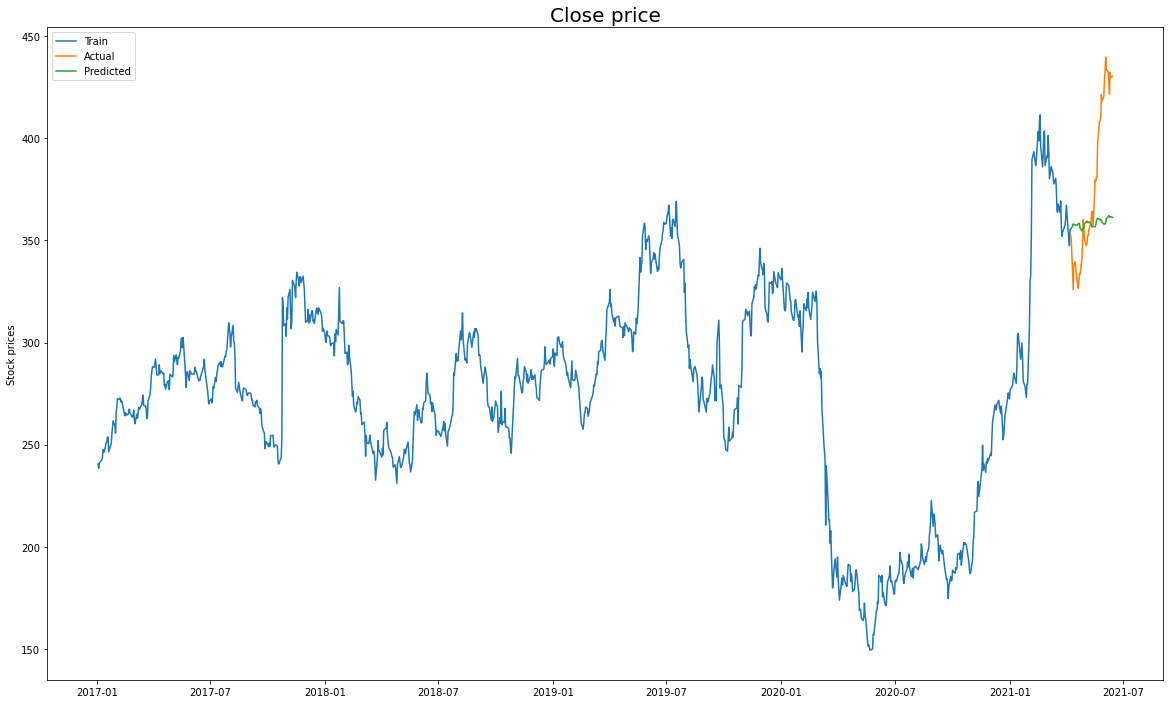

In [52]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Close'], exog=train_df['Open'], order=(1, 1, 1), seasonal_order=(1,1,1,4))
model_fit = model.fit(disp=False)
# make prediction

yhat = model_fit.predict(1050, 1094, exog = valid_df['Open'])
print(yhat)

C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1050    356.494275
1051    349.341757
1052    339.010931
1053    328.924773
1054    338.127116
1055    338.377756
1056    322.530534
1057    331.817763
1058    322.323021
1059    327.238088
1060    334.411067
1061    340.552158
1062    352.758624
1063    359.980973
1064    348.352182
1065    346.049569
1066    350.794279
1067    351.634839
1068    352.818700
1069    353.805190
1070    356.193534
1071    351.977762
1072    357.530689
1073    366.077142
1074    360.021920
1075    384.524187
1076    376.380827
1077    382.767285
1078    385.155655
1079    411.032463
1080    408.878161
1081    409.079192
1082    408.423938
1083    424.286266
1084    414.670153
1085    421.105692
1086    425.212233
1087    434.628580
1088    434.835160
1089    433.934442
1090    430.553356
1091    425.214517
1092    422.349366
1093    433.686011
1094    425.350529
Name: predicted_mean, dtype: float64


C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [54]:
yhat.index = valid_df.index



print("MSE for order=(1, 1, 1), seasonal_order=(1,1,1,4) is:    " + str(mse(yhat, valid_df['Close'])))

MSE for order=(1, 1, 1), seasonal_order=(1,1,1,4) is:    46.31217429574374


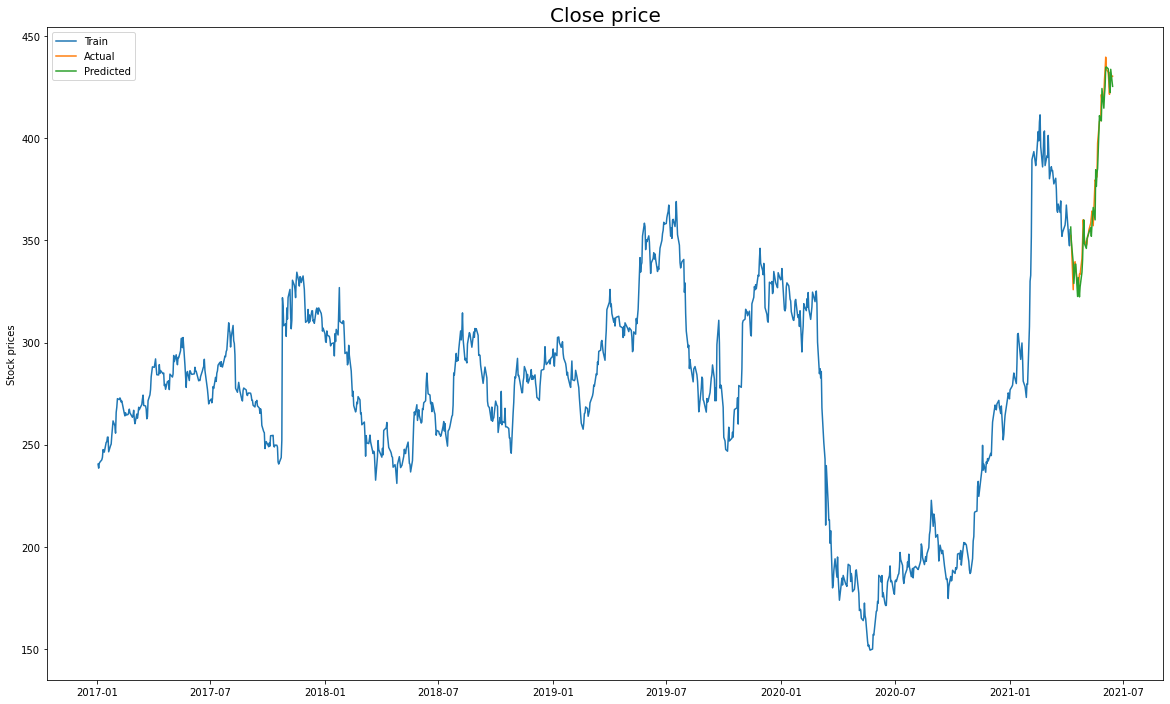

In [55]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### Simple Exponential Smoothing (SES)

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train_df['Close'])
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

1050    355.269958
1051    355.269958
1052    355.269958
1053    355.269958
1054    355.269958
1055    355.269958
1056    355.269958
1057    355.269958
1058    355.269958
1059    355.269958
1060    355.269958
1061    355.269958
1062    355.269958
1063    355.269958
1064    355.269958
1065    355.269958
1066    355.269958
1067    355.269958
1068    355.269958
1069    355.269958
1070    355.269958
1071    355.269958
1072    355.269958
1073    355.269958
1074    355.269958
1075    355.269958
1076    355.269958
1077    355.269958
1078    355.269958
1079    355.269958
1080    355.269958
1081    355.269958
1082    355.269958
1083    355.269958
1084    355.269958
1085    355.269958
1086    355.269958
1087    355.269958
1088    355.269958
1089    355.269958
1090    355.269958
1091    355.269958
1092    355.269958
1093    355.269958
1094    355.269958
dtype: float64


C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ROHIT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [57]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1946.057125175247

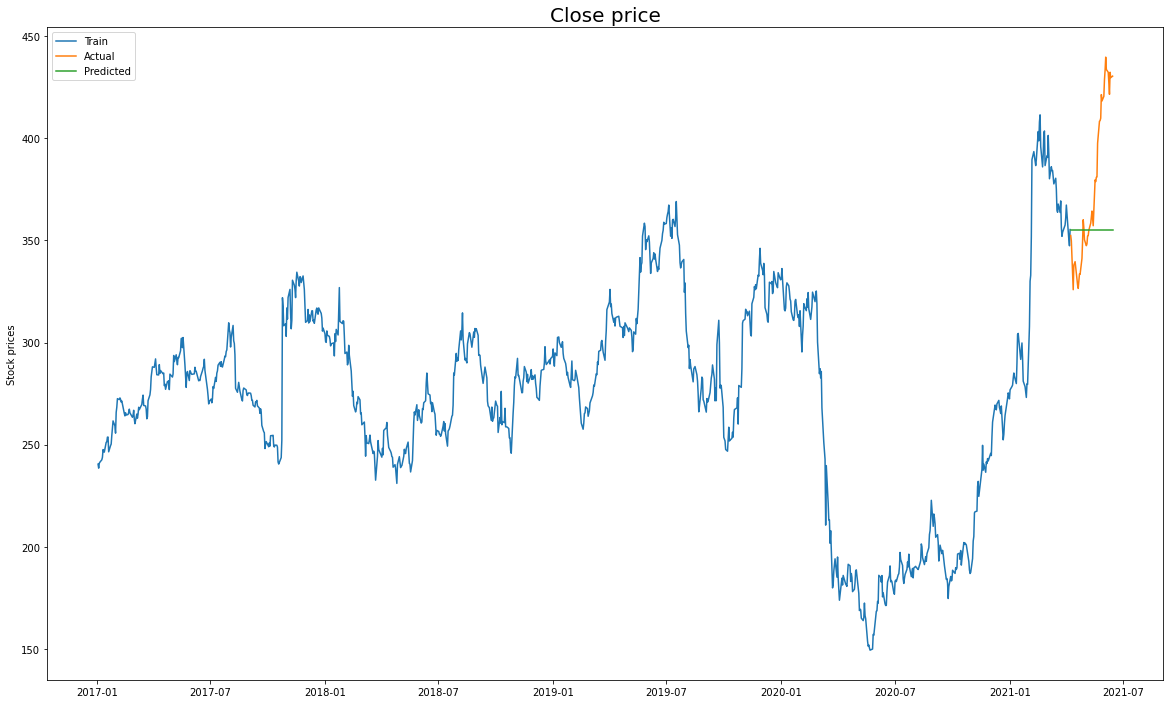

In [58]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()